<a href="https://colab.research.google.com/github/sfgrahman/custom_image_classification/blob/main/NN_Custom_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install split-folders

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torchsummary import summary
import splitfolders
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

In [6]:
torch.cuda.is_available()

False

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [8]:
transform = transforms.Compose([transforms.ToTensor()])

In [9]:
!unzip /content/Circle_Cross.zip

Archive:  /content/Circle_Cross.zip
   creating: Circle_Cross/
   creating: Circle_Cross/circles/
  inflating: Circle_Cross/circles/ci1.bmp  
  inflating: Circle_Cross/circles/ci10.bmp  
  inflating: Circle_Cross/circles/ci100.bmp  
  inflating: Circle_Cross/circles/ci1000.bmp  
  inflating: Circle_Cross/circles/ci101.bmp  
  inflating: Circle_Cross/circles/ci102.bmp  
  inflating: Circle_Cross/circles/ci103.bmp  
  inflating: Circle_Cross/circles/ci104.bmp  
  inflating: Circle_Cross/circles/ci105.bmp  
  inflating: Circle_Cross/circles/ci106.bmp  
  inflating: Circle_Cross/circles/ci107.bmp  
  inflating: Circle_Cross/circles/ci108.bmp  
  inflating: Circle_Cross/circles/ci109.bmp  
  inflating: Circle_Cross/circles/ci11.bmp  
  inflating: Circle_Cross/circles/ci110.bmp  
  inflating: Circle_Cross/circles/ci111.bmp  
  inflating: Circle_Cross/circles/ci112.bmp  
  inflating: Circle_Cross/circles/ci113.bmp  
  inflating: Circle_Cross/circles/ci114.bmp  
  inflating: Circle_Cross/circl

In [10]:
splitfolders.ratio("Circle_Cross", output="TrainTest", seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 2001 files [00:00, 6788.51 files/s]


In [11]:
train_data = datasets.ImageFolder('/content/TrainTest/train', transform=transform)
test_data = datasets.ImageFolder('/content/TrainTest/val', transform=transform)

In [14]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=32, drop_last=True)

class_names = train_data.classes
print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['circles', 'crosses']
Training images available: 1599
Testing images available:  401


In [15]:
for images, labels in train_loader:
  break
images.shape

torch.Size([32, 3, 116, 116])

In [16]:
labels

tensor([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1])

Label:  [1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1]
Class:  crosses crosses crosses circles crosses circles circles crosses circles crosses crosses crosses crosses circles crosses crosses circles crosses circles circles crosses crosses circles circles circles circles crosses crosses circles circles crosses crosses


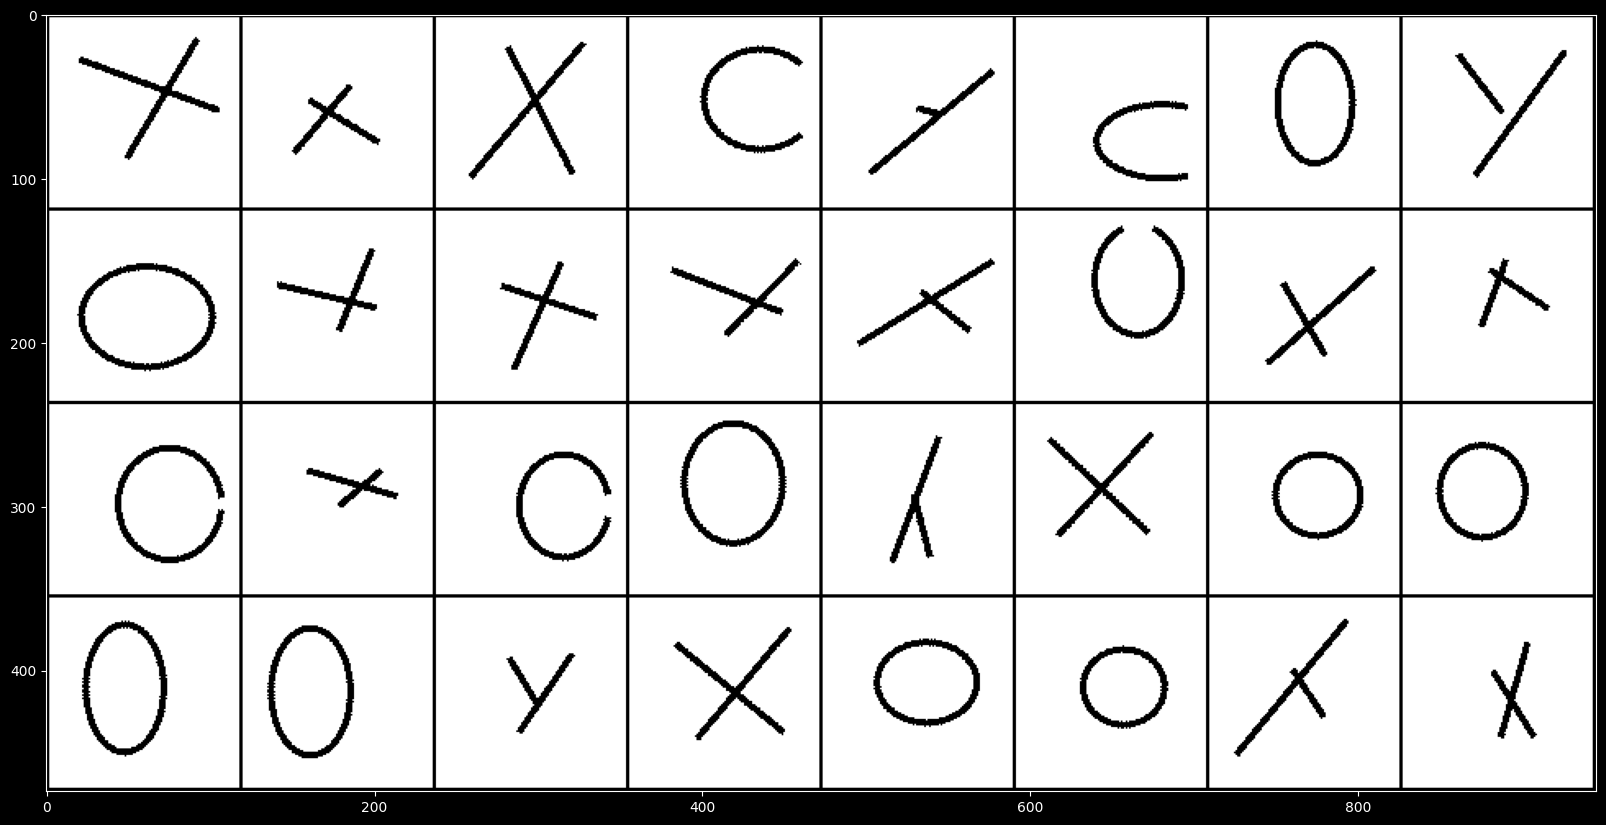

In [18]:
print('Label: ', labels.numpy())
print('Class: ', *np.array(class_names)[labels])
im = make_grid(images)
plt.figure(figsize=(20, 16))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

In [20]:
model = nn.Sequential(
    nn.Linear(3*116*116, 2048),
    nn.ReLU(),
    nn.Linear(2048,2048),
    nn.ReLU(),
    nn.Linear(2048,1024),
    nn.ReLU(),
    nn.Linear(1024,512),
    nn.ReLU(),
    nn.Linear(512,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,2)

)
model

Sequential(
  (0): Linear(in_features=40368, out_features=2048, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): ReLU()
  (4): Linear(in_features=2048, out_features=1024, bias=True)
  (5): ReLU()
  (6): Linear(in_features=1024, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=256, bias=True)
  (9): ReLU()
  (10): Linear(in_features=256, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=64, bias=True)
  (13): ReLU()
  (14): Linear(in_features=64, out_features=2, bias=True)
)

In [27]:
class NN_Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(3*116*116, 2048)
    self.fc1 = nn.Linear(2048, 2048)
    self.fc2 = nn.Linear(2048, 1024)
    self.fc3 = nn.Linear(1024, 512)
    self.fc4 = nn.Linear(512, 256)
    self.fc5 = nn.Linear(256, 128)
    self.fc6 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = self.input(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x= F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    x = F.relu(x)
    x = self.fc5(x)
    x = F.relu(x)
    x = self.fc6(x)
    x = F.relu(x)
    x = self.output(x)
    return x

In [28]:
model = NN_Classifier()

In [29]:
model

NN_Classifier(
  (input): Linear(in_features=40368, out_features=2048, bias=True)
  (fc1): Linear(in_features=2048, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
epochs = 36

lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.001)



losses = torch.zeros(epochs)
trainAcc = []
testAcc = []

for epoch in range(epochs):
  model.train()
  model.to(device)
  batchAcc =[]
  batchLoss = []
  for X, y in train_loader:
    X = X.reshape(32, 3*116*116)
    X, y = X.to(device), y.to(device)

    ypred = model(X)
    loss = lossfunc(ypred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batchLoss.append(loss.item())

    ypred = ypred.cpu()
    y=y.cpu()

    acc = 100*torch.mean((torch.argmax(ypred, axis=1)==y).float())
    batchAcc.append(acc)

  trainAcc.append(np.mean(batchAcc))
  losses[epoch] = np.mean(batchLoss)

  model.eval()
  with torch.no_grad():
    for X, y in test_loader:
      X = X.reshape(32, 3*116*116)
      X, y = X.to(device), y.to(device)

      ypred = model(X)
      ypred = ypred.cpu()
      y=y.cpu()

  testAcc.append(100*torch.mean((torch.argmax(ypred, axis=1)==y).float()))
  if (epoch % 5)==0:
    print(f'epochs: {epoch} loss: {loss.item()}')

epochs: 0 loss: 2.1136672496795654


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(losses,'g', lw=3, label='Train')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss: Loss vs Epochs')
ax[0].legend()

ax[1].plot(trainAcc,'b', lw=3, label='Train')
ax[1].plot(testAcc,'r', lw=3, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title('Training Accuracy: Accuracy vs Epochs')
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}%\n Test Accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()